
<a id='perm-income'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Poupança Ótima I: O Modelo de Renda Permanente


<a id='index-1'></a>

## Conteúdo

- [Poupança Ótima I: O Modelo de Renda Permanente](#Poupança-Ótima-I:-O-Modelo-de-Renda-Permanente)  
  - [Resumo](#Resumo)  
  - [O Problema da Poupança](#O-Problema-da-Poupança)  
  - [Representaçoes Alternativas](#Representações-Alternativas)  
  - [Dois Exemplos Clássicos](#Dois-Exemplos-Clássicos)  
  - [Leitura Adicional](#Leitura-Adicional)  
  - [Apêndice: A Equação de Euler](#Apêndice:-A-Equação-de-Euler)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Esta aula descreve uma versão das expectativas racionais do famoso modelo de renda permanente de Milton Friedman [[Fri56]](https://julia.quantecon.org/../zreferences.html#friedman1956).

Robert Hall colocou o modelo de Friedman dentro de um cenário linear quadrático [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978).

Assim como Hall, formulamos um horizonte infiníto do problema da poupança num cenário linear-quadrático.

Usamos o modelo como um veiculo para ilustrar:

- formulações alternativas do *estado* de um sistema dinâmico.
- a ideia de *cointegração*.  
- funções de impulso resposta. 
- a ideia de que mudanças no consumo são usuais como preditores de movimentos na renda.


As leituras básicas do modelo de renda permanente linear-quadrática-Gaussiana são de Hall  [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978)  e capítulo 2 de [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012).

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## O Problema da Poupança


<a id='index-2'></a>
Nesta seção, declaramos e resolvemos o problema de consumo e poupança enfrentado pelo consumidor.

### Preliminares

Usamos uma classe de processos estocásticos chamados
[martingales](https://en.wikipedia.org/wiki/Martingale_%28probability_theory%29).

Um tempo discreto de martingale é um processo estocástico (ou seja, uma sequência de variáveis aleatórias)
$ \{X_t\} $ com média finita em cada $ t $ e satisfazendo:

$$
\mathbb{E}_t [X_{t+1} ] = X_t, \qquad t = 0, 1, 2, \ldots
$$

Aqui $ \mathbb{E}_t := \mathbb{E}[ \cdot \,|\, \mathcal{F}_t] $ é uma expectativa matemática condicional condicionada ao tempo $ t $
*conjunto de informação* $ \mathcal{F}_t $.

O último é apenas uma coleção de variáveis aleatórias que o modelador declara ser visível em $ t $.

- Quando não definido explicitamente, geralmente se entende que $ \mathcal{F}_t = \{X_t, X_{t-1}, \ldots, X_0\} $.  


Os Martingales têm a característica de que o histórico de resultados passados não fornece poder preditivo para mudanças entre os resultados atuais e futuros.

Por exemplo, a riqueza atual de um jogador envolvido em um "jogo justo" possui essa propriedade.

Uma classe comum de martingales é a família de *passeios aleatórios*.

Um **passeio aleatório** é um processo estocástico $ \{X_t\} $ que satisfaz:

$$
X_{t+1} = X_t + w_{t+1}
$$

para uma sequência de *inovação* iid de média zero $ \{w_t\} $.

Evidentemente $ X_t $ também pode ser expressado como:

$$
X_t = \sum_{j=1}^t w_j + X_0
$$

Nem todo martingale surge como um passeio aleatório (veja, por exemplo, [o martingale de Wald
](https://en.wikipedia.org/wiki/Wald%27s_martingale)).

### O Problema de Decisão

Um consumidor tem preferências sobre fluxos de consumo ordenados pela utilidade funcional.


<a id='equation-sprob1'></a>
$$
\mathbb{E}_0 \left[ \sum_{t=0}^\infty \beta^t u(c_t) \right] \tag{1}
$$

onde:

- $ \mathbb{E}_t $ é a expressão matemática condicionada ao tempo $ t $ do consumidor em formação.
- $ c_t $ é o tempo $ t $ do consumo.
- $ u $ é uma função de utilidade estritamente côncava de um período.  
- $ \beta \in (0,1) $ é um fator de desconto.


O consumidor maximiza [(1)](#equation-sprob1) escolhendo um consumo e emprestimo $ \{c_t, b_{t+1}\}_{t=0}^\infty $ sujeito à sequência de restrições orçamentárias:


<a id='equation-sprob2'></a>
$$
c_t + b_t = \frac{1}{1 + r} b_{t+1} +  y_t   \quad t \geq 0 \tag{2}
$$

Aqui:

- $ y_t $ é um processo de doação exógena.
- $ r > 0 $ é uma taxa de juros liquida, livre de risco e invariante no tempo 
- $ b_t $ é a dívida livre de risco de um período com vencimento em $ t $  


O consumidor também enfrenta as condições iniciais $ b_0 $ e $ y_0 $, que podem ser fixadas ou aleatórias.

### Suposições

No restante desta aula, seguimos Friedman e Hall assumindo que  $ (1 + r)^{-1} = \beta $.

Em relação ao processo de doação, supomos que ele tenha a [representação do espaço de estado](https://julia.quantecon.org/../tools_and_techniques/linear_models.html).


<a id='equation-sprob15ab'></a>
$$
\begin{aligned}
    z_{t+1} & = A z_t + C w_{t+1}
    \\
    y_t & = U  z_t
\end{aligned} \tag{3}
$$

onde:

- $ \{w_t\} $ é um processo de vetor iid com $ \mathbb{E} w_t = 0 $ e $ \mathbb{E} w_t w_t' = I $  
- o [raio espectral](https://julia.quantecon.org/../tools_and_techniques/linear_algebra.html#la-neumann-remarks) de $ A $ satisfaz $ \rho(A) < \sqrt{1/\beta} $  
- $ U $ é um vetor de seleção que fixa $ y_t $ como uma combinação linear particular dos componentes de $ z_t $.  


A restrição em $ \rho(A) $ impede que a renda cresça tão rapidamente e que somas geométricas descontadas de algumas formas quadráticas a serem descritas abaixo se tornem infinitas.

Em relação às preferências, assumimos a função de utilidade quadrática:

$$
u(c_t) =  - (c_t - \gamma)^2
$$

onde $ \gamma $ é um nível de felicidade do consumo.

>**Nota**
>
>Juntamente com essa especificação de utilidade quadrática, permitimos que o consumo seja negativo. No entanto, escolhendo os parâmetros adequadamente, podemos fazer com que a probabilidade de o modelo gerar caminhos de consumo negativos em horizontes de tempo finitos seja tão baixa quanto desejado.

Finalmente, impomos a condição do *esquema de 'No Ponzi*. 


<a id='equation-sprob3'></a>
$$
\mathbb{E}_0 \left[ \sum_{t=0}^\infty \beta^t b_t^2 \right] < \infty \tag{4}
$$

Essa condição exclui um esquema de empréstimo sempre que permitiria ao consumidor desfrutar do consumo de "felicidade" para sempre.

### Condições de Primeira Ordem

As condições de primeira ordem para maximizar [(1)](#equation-sprob1) sujeito a [(2)](#equation-sprob2) são:


<a id='equation-sprob4'></a>
$$
\mathbb{E}_t [u'(c_{t+1})] = u'(c_t) , \qquad t = 0, 1, \ldots \tag{5}
$$

Essas condições de otimização também são conhecidas com  *Euler equations*.

Se você não tiver certeza de onde eles vêm, pode encontrar um esboço de prova no
[apêndice](#perm-income-appendix).

Com a nossa expecificação de preferência quadrática, [(5)](#equation-sprob4) tem a impressionante implicação de que o consumo segue um martingale:


<a id='equation-sprob5'></a>
$$
\mathbb{E}_t [c_{t+1}] = c_t \tag{6}
$$

(De fato preferências quadráticas são *necessárias* para essa conclusão <sup><a href=#f2 id=f2-link>[1]</a></sup>)

Uma maneira de interpretar [(6)](#equation-sprob5) é que o consumo irá mudar apenas quando
“novas informações” sobre a renda permanente são reveladas.

Essas ideias estarão esclarecidas abaixo.


<a id='odr-pi'></a>

### A Regra da Decisão Ótima

Agora vamos deduzir a regra da decisão ótima <sup><a href=#fod id=fod-link>[2]</a></sup>.

>**Nota**
>
>Uma maneira de resolver o problema do consumidor é aplicando *programação dinâmica*
como [nessa aula](https://julia.quantecon.org/lqcontrol.html). Mas primeiro usamos uma abordagem alternativa que é reveladora e mostra o trabalho que a programação dinâmica faz por nós nos bastidores.

Ao fazer isso, precisamos combinar:

1. a condição de otimização [(6)](#equation-sprob5).  
1. a restrição orcamentária período a período [(2)](#equation-sprob2), e  
1. a condição de limite [(4)](#equation-sprob3).  


Para conseguir isso, observe primeiro que [(4)](#equation-sprob3) implica $ \lim_{t \to \infty} \beta^{\frac{t}{2}} b_{t+1}= 0 $.

Usando esta restrição no caminho da dívida e resolvendo [(2)](#equation-sprob2) os rendimentos futuros são:


<a id='equation-sprob6'></a>
$$
b_t = \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j}) \tag{7}
$$

Tomando expectativa condicional de ambos os lados [(7)](#equation-sprob6) e usando a propriedade de martingale do consumo e da *lei das expectativas iteradas* para deduzir:


<a id='equation-sprob7'></a>
$$
b_t = \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - \frac{c_t}{1-\beta} \tag{8}
$$

Expressado em termos de $ c_t $ obtemos:


<a id='equation-sprob8'></a>
$$
c_t
 = (1-\beta) \left[ \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - b_t\right]
 = {r \over 1+r} \left[ \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - b_t\right] \tag{9}
$$

onde a última igualdade usa  $ (1 + r) \beta = 1 $.

Essas duas últimas equaçõesafirmam que consumo é igual a *renda econômica*.

- **riqueza financeira** é igual a $ -b_t $. 
- **riqueza não-financeira** é igual a $ \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] $.  
- **riqueza total** é igual a soma da riqueza financeira e a riqueza não-financeira.
- A **propensão marginal a consumir da riqueza total** é igual ao fator de interesse $ \frac{r}{1+r} $  
- **a renda econômica** é igual:
  - uma propensão marginal a consumir constante vezes a soma da riqueza financeira e a riqueza não-financeira.
  - a quantidade que o consumidor pode consumir enquanto mantém sua riqueza intacta.

#### Respondendo ao Estado

O vetor *estado* que o consumidor confronta em $ t $ é $ \begin{bmatrix} b_t & z_t \end{bmatrix} $.

Aqui:

- $ z_t $ é um componente *exógeno*, não afetado pelo comportamento do consumidor.
- $ b_t $ é um componente *endógeno* (de modo que, depende da regra de decisão)  


Observe que $ z_t $ contém todas as variáveis úteis para prever a doação futura do consumidor.

É plausível que as decisões atuais de $ c_t $ e $ b_{t+1} $ devam ser expressáveis como funções de $ z_t $ e $ b_t $.

Este é realmente o caso.

De fato, a partir [dessa discursão](https://julia.quantecon.org/../tools_and_techniques/linear_models.html#lm-fgs) vemos que:

$$
\sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}]
= \mathbb{E}_t \left[ \sum_{j=0}^\infty \beta^j y_{t+j} \right]
= U(I - \beta A)^{-1} z_t
$$

combinado com [(9)](#equation-sprob8) nos dá:


<a id='equation-pi-cpa'></a>
$$
c_t
 = {r \over 1+r}
     \left[
         U(I - \beta A)^{-1} z_t - b_t
     \right] \tag{10}
$$

Usando essa igualdade para eliminar $ c_t $ na restrição orcamentária [(2)](#equation-sprob2) nos dá:

$$
\begin{aligned}
    b_{t+1}
    & = (1 + r) (b_t + c_t - y_t)
    \\
    & = (1 + r) b_t + r [ U(I - \beta A)^{-1} z_t - b_t]  - (1+r) U z_t
    \\
    & = b_t +  U [ r(I - \beta A)^{-1}  - (1+r) I ]  z_t
    \\
    & = b_t +  U (I - \beta A)^{-1} (A - I)   z_t
\end{aligned}
$$

Para passar da penúltima para última expressão nessa cadeia de igualdades não é tão trivial.

Um jeito é usar o fato de que $ (1 + r) \beta = 1 $ e $ (I - \beta A)^{-1} = \sum_{j=0}^{\infty} \beta^j A^j $.

Agora escrevemos com sucesso $ c_t $ e $ b_{t+1} $ como funções de $ b_t $ e $ z_t $.

#### Uma Representação do Espaço de Estado

Podemos resumir nossa dinâmica na forma de um sistema linear de espaço de estado que rege o consumo, a dívida e a renda:


<a id='equation-pi-ssr'></a>
$$
\begin{aligned}
  z_{t+1} & = A z_t + C w_{t+1} \\
  b_{t+1} & = b_t + U [ (I -\beta A)^{-1} (A - I) ] z_t \\
      y_t & = U z_t \\
      c_t & = (1-\beta) [ U(I-\beta A)^{-1} z_t - b_t ]
\end{aligned} \tag{11}
$$

Para escrever isso mais de forma mais sucinta, faça:

$$
x_t =
\begin{bmatrix}
    z_t\\
    b_t
\end{bmatrix},
\quad
\tilde A =
\begin{bmatrix}
    A & 0 \\
    U(I-\beta A)^{-1}(A-I) & 1
 \end{bmatrix},
 \quad
\tilde C =
\begin{bmatrix}
    C\\
    0
\end{bmatrix}
$$

e

$$
\tilde U =
\begin{bmatrix}
    U & 0 \\
    (1-\beta) U (I - \beta A)^{-1} & -(1-\beta)
\end{bmatrix}, \quad
\tilde y_t =
\begin{bmatrix}
      y_t\\
      c_t
  \end{bmatrix}
$$

Então podemos expressar a equação  [(11)](#equation-pi-ssr) como:


<a id='equation-pi-stsp'></a>
$$
\begin{aligned}
  x_{t+1} & = \tilde A x_t + \tilde C w_{t+1} \\
  \tilde y_t & = \tilde U x_t
\end{aligned} \tag{12}
$$

Podemos usar as fórmulas a seguir a partir de [modelos lineares de espaço de estado](https://julia.quantecon.org/../tools_and_techniques/linear_models.html) para calcular a média populacional $ \mu_t = \mathbb{E}    x_t $ e covariância $ \Sigma_t := \mathbb{E} [ (x_t - \mu_t) (x_t - \mu_t)'] $


<a id='equation-lss-mut-perm-income'></a>
$$
\mu_{t+1} = \tilde A \mu_t
\quad \text{com} \quad \mu_0 \text{ dado} \tag{13}
$$


<a id='equation-eqsigmalaw'></a>
$$
\Sigma_{t+1}  = \tilde A  \Sigma_t \tilde A' + \tilde C \tilde C'
\quad \text{com} \quad \Sigma_0 \text{ dado} \tag{14}
$$

Podemos então computar a média e a covariância de $ \tilde y_t $ a partir de:


<a id='equation-eqymoments'></a>
$$
\begin{aligned}
\mu_{y,t} = \tilde U \mu_t \\
\Sigma_{y,t} = \tilde U \Sigma_t \tilde U'
\end{aligned} \tag{15}
$$

#### Um Simples Exemplo com Renda *iid*

Para obter alguma intuição preliminar sobre as implicações de [(11)](#equation-pi-ssr), , vejamos um exemplo altamente estilizado em que a renda é apenas iid.

(Exemplos posteriores investigarão fluxos de renda mais realistas)

Em particular, seja $ \{w_t\}_{t = 1}^{\infty} $ iid e escalar padrão normal, e seja

$$
z_t =
\begin{bmatrix}
    z^1_t \\
    1
\end{bmatrix},
\quad
A =
\begin{bmatrix}
    0 & 0 \\
    0 & 1 \\
\end{bmatrix},
\quad
U =
\begin{bmatrix}
    1 & \mu
\end{bmatrix},
\quad
C =
\begin{bmatrix}
    \sigma \\
    0
\end{bmatrix}
$$

Finalmente, faça $ b_0 = z^1_0 = 0 $.

Sob essas suposições temos que $ y_t = \mu + \sigma w_t \sim N(\mu, \sigma^2) $.

Além disso, se você trabalhar com a representação do espaço de estados, verá que

$$
\begin{aligned}
    b_t & = - \sigma \sum_{j=1}^{t-1} w_j
    \\
    c_t & = \mu + (1 - \beta) \sigma \sum_{j=1}^t w_j
\end{aligned}
$$

Assim, a renda é iid e a dívida e o consumo são ambos passeios aleatórios gaussianos.

Definindo ativos como  $ -b_t $, vemos que os ativos são apenas a soma acumulada de receitas imprevistas antes da data presente.

A próxima figura mostra uma realização típica com r= $ r = 0.05 $, $ \mu = 1 $, and $ \sigma = 0.15 $

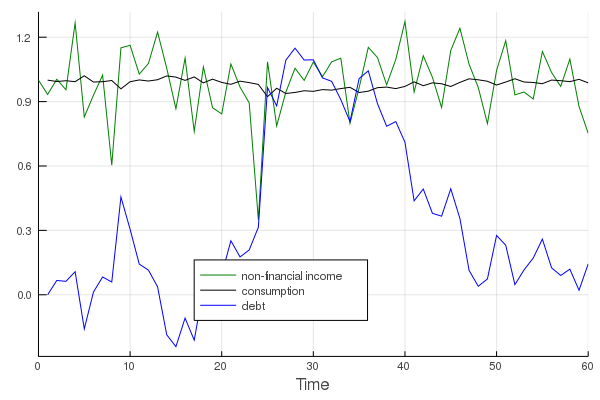

In [3]:
using Plots, Random
gr(fmt=:png);

Random.seed!(42)

const r = 0.05
const β = 1.0 / (1.0 + r)
const T = 60
const σ = 0.15
const μ = 1.0

function time_path2()
    w = randn(T+1)
    w[1] =  0.0
    b = zeros(T+1)
    for t=2:T+1
        b[t] = sum(w[1:t])
    end
    b .*= -σ
    c = μ .+ (1.0 - β) .* (σ .* w .- b)
    return w, b, c
end

w, b, c = time_path2()
p = plot(0:T, μ .+ σ .* w, color = :green, label = "non-financial income")
plot!(c, color = :black, label = "consumption")
plot!(b, color = :blue, label = "debt")
plot!(xlabel = "Time", linewidth = 2, alpha = 0.7,
      xlims = (0, T), legend = :bottom)

Observe que o consumo é consideravelmente mais suave que a renda.

A figura abaixo mostra os caminhos de consumo de 250 consumidores com fluxos de renda independentes.


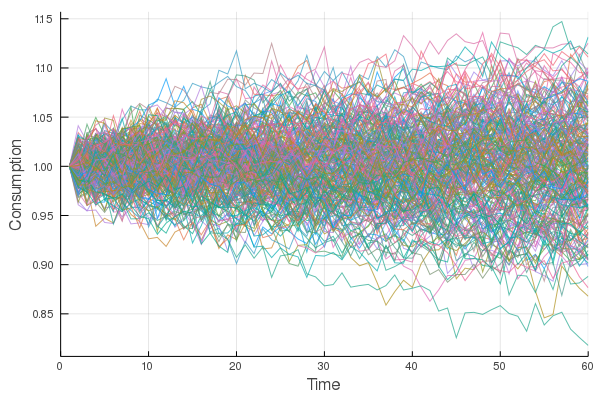

In [4]:
time_paths = []
n = 250

for i in 1:n
    push!(time_paths, time_path2()[3])
end

p = plot(time_paths, linewidth = 0.8, alpha=0.7, legend = :none)
plot!(xlabel = "Time", ylabel = "Consumption", xlims = (0, T))

## Representações Alternativas

Nesta seção, lançamos mais luz sobre a evolução da poupança, dívida e consumo, representando sua dinâmica de várias maneiras diferentes.

### Representação de Hall


<a id='index-3'></a>
Hall [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978) sugeriu uma maneira perspicaz de resumir as implicações da teoria da renda permanente de QL.

Primeiro, para representar a solução para $ b_t $, desloque [(9)](#equation-sprob8) um período para frente e elimine $ b_{t+1} $ usando [(2)](#equation-sprob2) para obter

$$
c_{t+1} = (1-\beta)\sum_{j=0}^\infty \beta^j  \mathbb{E}_{t+1} [y_{t+j+1}] - (1-\beta) \left[ \beta^{-1} (c_t + b_t - y_t) \right]
$$

Se somarmos e subtrairmos $ \beta^{-1} (1-\beta) \sum_{j=0}^\infty \beta^j \mathbb{E}_t y_{t+j} $ do lado direito da euqação anterior e reorganizarmos, obtemos:


<a id='equation-sprob11'></a>
$$
c_{t+1} - c_t = (1-\beta) \sum_{j=0}^\infty \beta^j
    \left\{ \mathbb{E}_{t+1} [y_{t+j+1}] - \mathbb{E}_t [y_{t+j+1}] \right\} \tag{16}
$$

O lado direito é o tempo $ t+1 $ de *inovação para o valor presente esperado* do processo de renda $ \{y_t\} $.

Podemos representar a regra de decisão ótima para $ (c_t, b_{t+1}) $ na forma de [(16)](#equation-sprob11) e [(8)](#equation-sprob7), que repetimos:


<a id='equation-sprob7aa'></a>
$$
b_t = \sum_{j=0}^\infty \beta^j \mathbb{E}_t [y_{t+j}] - {1 \over 1-\beta} c_t \tag{17}
$$

A equação [(17)](#equation-sprob7aa) afirma que a dívida do consumidor em $ t $ é igual ao valor presente esperado de sua renda menos o valor presente esperado de seu fluxo de consumo.

Uma dívida alta indica, assim, um grande valor presente esperado dos excedentes  $ y_t - c_t $.

Recordando novamente nossa discussão sobre a [previsão de somas geométricas](https://julia.quantecon.org/../tools_and_techniques/linear_models.html#lm-fgs), temos:

$$
\begin{aligned}
    \mathbb{E}_t \sum_{j=0}^\infty \beta^j y_{t+j} &= U (I-\beta A)^{-1} z_t \\
    \mathbb{E}_{t+1} \sum_{j=0}^\infty \beta^j y_{t+j+1} & = U (I -\beta A)^{-1} z_{t+1} \\
    \mathbb{E}_t \sum_{j=0}^\infty \beta^j y_{t+j+1} & = U (I - \beta A)^{-1} A z_t
\end{aligned}
$$

O uso dessas fórmulas em conjunto com [(3)](#equation-sprob15ab) e a substituição em [(16)](#equation-sprob11) e [(17)](#equation-sprob7aa) fornece a seguinte representação para a regra de decisão ideal do consumidor:


<a id='equation-sprob16abcd'></a>
$$
\begin{aligned}
    c_{t+1} & = c_t + (1-\beta) U  (I-\beta A)^{-1} C w_{t+1} \\
    b_t & = U (I-\beta A)^{-1} z_t - {1 \over 1-\beta} c_t \\
    y_t & = U z_t \\
    z_{t+1} & = A z_t + C w_{t+1}
\end{aligned} \tag{18}
$$

A representação [(18)](#equation-sprob16abcd) deixa claro que:

- O estado pode ser tomado como $ (c_t, z_t) $.  
  
  - A parte endógena é $ c_t $ e a parte exógena é $ z_t $.  
  - O débito $ b_t $ desapareceu como um componente do estado porque está codificado em $ c_t $.  
  
- O consumo é um passeio aleatório com inovação $ (1-\beta) U  (I-\beta A)^{-1} C w_{t+1} $.  
  
  - Isso é uma representação mais explícita do resultado do martingale em [(6)](#equation-sprob5).  
  



<a id='coint-pi'></a>

### Cointegração

A representação [(18)](#equation-sprob16abcd) revela que o processo conjunto $ \{c_t, b_t\} $ possui a propriedade que Engle e Granger [[EG87]](https://julia.quantecon.org/../zreferences.html#englegranger1987) chamada de [cointegração](https://en.wikipedia.org/wiki/Cointegration).

A cointegração é uma ferramenta que nos permite aplicar resultados poderosos da teoria dos processos estocásticos estacionários a (certas transformações de) modelos não estacionários.

Para aplicar a cointegração no presente contexto, suponha que $ z_t $ é assintoticamente estacionária <sup><a href=#fn-as id=fn-as-link>[4]</a></sup>.

Apesar disso, ambos $ c_t $ e $ b_t $ serão não estacionários pois possuem raizes unitárias (veja [(11)](#equation-pi-ssr) para $ b_t $).

No entanto, existe uma combinação linear de $ c_t, b_t $ que *é* assintoticamente estacionária.

Em particular, a partir da segunda igualdade em [(18)](#equation-sprob16abcd) temos:


<a id='equation-pi-spr'></a>
$$
(1-\beta) b_t + c_t = (1 - \beta) U (I-\beta A)^{-1} z_t \tag{19}
$$

Portanto a combinação linear $ (1-\beta) b_t + c_t $ é assintoticamente estacionária.

De acordo com, Engle e Grange poderiams chamar $ \begin{bmatrix} (1-\beta) & 1 \end{bmatrix} $ de um **vetor cointegrante** para o estado.

Quando aplicado ao processo vetorial não estacionários $ \begin{bmatrix} b_t  & c_t \end{bmatrix}' $,  gera um processo assintoticamente estacionário.

A equação [(19)](#equation-pi-spr) pode ser reorganizada para assumir a forma:


<a id='equation-sprob77'></a>
$$
(1-\beta) b_t + c_t = (1-\beta) \mathbb{E}_t \sum_{j=0}^\infty \beta^j y_{t+j}. \tag{20}
$$

A equação [(20)](#equation-sprob77) afirma que o *resíduo de cointegração* no lado esquerdo é igual à expectativa condicional da soma geométrica dos rendimentos futuros do lado direito <sup><a href=#f8 id=f8-link>[6]</a></sup>.

### Implicações Transversais

Considere novamente [(18)](#equation-sprob16abcd), desta vez à luz de nossa discussão sobre dinâmica de distribuição na [aula sobre sistemas lineares](https://julia.quantecon.org/../tools_and_techniques/linear_models.html).

A dinâmica de $ c_t $ é dada por:


<a id='equation-pi-crw'></a>
$$
c_{t+1} = c_t + (1-\beta) U  (I-\beta A)^{-1} C w_{t+1} \tag{21}
$$

ou

$$
c_t = c_0 + \sum_{j=1}^t \hat w_j
\quad \text{para} \quad
\hat w_{t+1} := (1-\beta) U  (I-\beta A)^{-1} C w_{t+1}
$$

A raiz unitária que afeta $ c_t $ faz que a variação no tempo $ t $ de $ c_t $ cresça linearmente com $ t $.

Em particular, de modo que $ \{ \hat w_t \} $ é iid, temos:


<a id='equation-pi-vt'></a>
$$
\mathrm{Var}[c_t] = \mathrm{Var}[c_0] + t \, \hat \sigma^2 \tag{22}
$$

Onde

$$
\hat \sigma^2 := (1-\beta)^2 U  (I-\beta A)^{-1} CC' (I-\beta A')^{-1} U'
$$

Quando $ \hat \sigma > 0 $, $ \{c_t\} $ não possui distribuição assimtótica.

Vamos considerar que isso significa para dados transversais de consumidores idênticos ex ante nascidos no tempo $ t_0 $.

Fazendo a distribuição de $ c_0 $ representar os valores transversais de consumo inicial.

A equação [(22)](#equation-pi-vt) nos diz que a variância de $ c_t $ aumenta ao longo do tempo a uma taxa proporcional a $ t $.

Vários estudos diferentes investigaram essa previsão e encontraram algum suporte para ela (veja, por exemplo, [[DP94]](https://julia.quantecon.org/../zreferences.html#deatonpaxton1994), [[STY04]](https://julia.quantecon.org/../zreferences.html#sty2004)).

### Funções de Impulso Resposta

As funções de resposta a impulsos medem respostas a vários impulsos (choques temporários).

A função de impulso resposta de $ \{c_t\} $ para a inovação $ \{w_t\} $ é uma caixa.

Em particular, a resposta de $ c_{t+j} $ a um aumento unitário da inovação $ w_{t+1} $ é $ (1-\beta) U (I -\beta A)^{-1} C $ para todo $ j \geq 1 $.

### Representação de Média Móvel

É útil expressar a inovação para o valor presente esperado do processo de renda em termos de uma representação da média móvel da renda $ y_t $.

O processo de renda é definido por [(3)](#equation-sprob15ab) tendo a representação de média movel.


<a id='equation-sprob12'></a>
$$
y_{t+1} = d(L) w_{t+1} \tag{23}
$$

onde

- $ d(L) = \sum_{j=0}^\infty d_j L^j $ para alguma sequência $ d_j $, onde $ L $ é o operador defasagem <sup><a href=#f4 id=f4-link>[3]</a></sup>  
- no momento $ t $, o consumidor possui o conjunto de informação <sup><a href=#f5 id=f5-link>[5]</a></sup> $ w^t = [w_t, w_{t-1}, \ldots ] $  


Perceba que,

$$
y_{t+j} - \mathbb{E}_t [y_{t+j}] = d_0 w_{t+j} + d_1 w_{t+j-1} + \cdots + d_{j-1} w_{t+1}
$$

Segue que,


<a id='equation-sprob120'></a>
$$
\mathbb{E}_{t+1} [y_{t+j}] - \mathbb{E}_t [y_{t+j}] = d_{j-1} w_{t+1} \tag{24}
$$

Usando [(24)](#equation-sprob120) em [(16)](#equation-sprob11) temos:


<a id='equation-sprob13'></a>
$$
c_{t+1} - c_t = (1-\beta) d(\beta) w_{t+1} \tag{25}
$$

O objeto $ d(\beta) $ é o **valor presente dos coeficientes de média móvel** na representação para o processo de renda  $ y_t $.


<a id='sub-classic-consumption'></a>

## Dois Exemplos Clássicos

Ilustramos algumas das idéias anteriores com dois exemplos.

Nos dois exemplos, a renda segue o processo  $ y_t = z_{1t} + z_{2t} $ onde:

$$
\begin{bmatrix}
  z_{1 t+1} \\
  z_{2t+1}
\end{bmatrix}
=
\begin{bmatrix}
  1 & 0 \\
  0 & 0
\end{bmatrix}
\begin{bmatrix}
  z_{1t} \\
  z_{2t}
\end{bmatrix}
+ \begin{bmatrix}
      \sigma_1 & 0 \\
      0 & \sigma_2
  \end{bmatrix}
  \begin{bmatrix}
      w_{1t+1} \\
      w_{2t+1}
  \end{bmatrix}
$$

Aqui:

- $ w_{t+1} $ é um processo iid $ 2 \times 1 $ distribuido como $ N(0,I) $.  
- $ z_{1t} $ é um componente permanente de $ y_t $.  
- $ z_{2t} $ é um componente puramente transitório de $ y_t $. 

### Exemplo 1

Suponha como antes que o consumidor observe o estado $ z_t $ no período $ t $.

Em vista de [(18)](#equation-sprob16abcd) temos:


<a id='equation-consexample1'></a>
$$
c_{t+1} - c_t = \sigma_1 w_{1t+1} + (1-\beta) \sigma_2 w_{2t+1} \tag{26}
$$

A fórmula [(26)](#equation-consexample1) mostra como um incremento $ \sigma_1 w_{1t+1} $ para o componente da renda permanente $ z_{1t+1} $ leva a:

- um aumento permanente no consumo de um por um, e   
- nenhum aumento na poupança $ -b_{t+1} $.  


Mas o componente puramente transitório da renda $ \sigma_2 w_{2t+1} $ leva a um incremento permanente no consumo por uma fração $ 1-\beta $ da renda transitória.

A fração restante $ \beta $ é poupada, levando a um incremento permanente em $ -b_{t+1} $.

A aplicação da fórmula da dívida em [(11)](#equation-pi-ssr) para esse exemplo mostra que:


<a id='equation-consexample1a'></a>
$$
b_{t+1} - b_t = - z_{2t} = - \sigma_2 w_{2t} \tag{27}
$$

Isso confirma que nenhum dos  $ \sigma_1 w_{1t} $ é poupado, enquanto todos os $ \sigma_2 w_{2t} $ são poupados.

A figura a seguir ilustra essas reações muito diferentes a choques transitórios e permanentes de renda usando funções de impulso resposta.

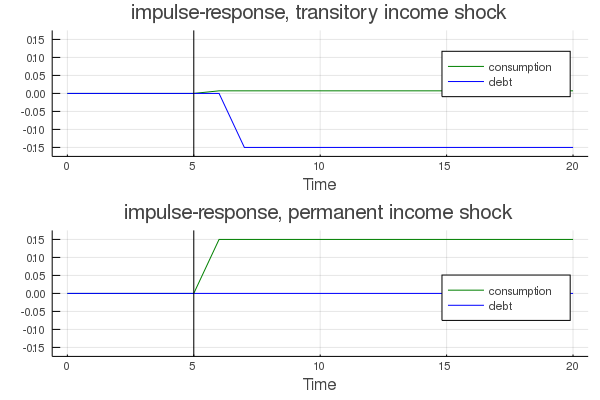

In [5]:
const r = 0.05
const β = 1.0 / (1.0 + r)
const T2 = 20  # Horizonte de tempo
const S = 5   
const σ1 = 0.15
const σ2 = 0.15


function time_path(permanent = false)
    w1 = zeros(T2+1)
    w2 = similar(w1)
    b = similar(w1)
    c = similar(w1)

    if permanent === false
        w2[S+2] = 1.0
    else
        w1[S+2] = 1.0
    end

    for t=2:T2
        b[t+1] = b[t] - σ2 * w2[t]
        c[t+1] = c[t] + σ1 * w1[t+1] + (1 - β) * σ2 * w2[t+1]
    end

    return b, c
end

L = 0.175

b1, c1 = time_path(false)
b2, c2 = time_path(true)
p = plot(0:T2, [c1 c2 b1 b2], layout = (2, 1),
        color = [:green :green :blue :blue],
        label = ["consumption" "consumption" "debt" "debt"])
t = ["impulse-response, transitory income shock"
     "impulse-response, permanent income shock"]
plot!(title = reshape(t, 1, length(t)), xlabel = "Time", ylims = (-L, L),
      legend = [:topright :bottomright])
vline!([S S], color = :black, layout = (2, 1), label = "")

### Exemplo 2

Suponha agora que no momento $ t $ o consumidor observa $ y_t $, e sua trajetória até $ t $, mas não $ z_t $.

Sob essa suposição, é apropriado usar uma *representação de inovação* para formar $ A, C, U $ em [(18)](#equation-sprob16abcd).

A discursão na seção 2.9.1 e 2.11.3 de [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012) mostram que a a representação do espaço de estados pertinente para $ y_t $ é:

$$
\begin{aligned}
  \begin{bmatrix}
    y_{t+1} \\
    a_{t+1}
  \end{bmatrix}
    & =
    \begin{bmatrix}
        1 & -(1 - K) \\
        0 & 0
    \end{bmatrix}
    \begin{bmatrix}
        y_t \\
        a_t
    \end{bmatrix}
    +
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix}
    a_{t+1}
    \\
    y_t
    & =
    \begin{bmatrix}
        1 & 0
    \end{bmatrix}
    \begin{bmatrix}
        y_t \\
        a_t
    \end{bmatrix}
\end{aligned}
$$

onde

- $ K := $ o ganho estacionário de Kalman
- $ a_t := y_t - E [ y_t \,|\, y_{t-1}, \ldots, y_0] $  


Na mesma discursão [[LS18]](https://julia.quantecon.org/../zreferences.html#ljungqvist2012) é mostrado que $ K \in [0,1] $ e que $ K $ aumenta como $ \sigma_1/\sigma_2 $ faz.

Em outras palavas, $ K $ aumenta à medida que aumenta a proporção do desvio padrão do choque permanente com o do choque transitório.

Por favor veja [uma primeira olhada no Filtro de Kalman](https://julia.quantecon.org/../tools_and_techniques/kalman.html).

Aplicando as fórmulas [(18)](#equation-sprob16abcd) implica que:


<a id='equation-consexample2'></a>
$$
c_{t+1} - c_t = [1-\beta(1-K) ] a_{t+1} \tag{28}
$$

onde o processo de renda pode agora ser representado em termos de inovação univariada para $ y_t $ como:


<a id='equation-incomemaar'></a>
$$
y_{t+1} - y_t = a_{t+1} - (1-K) a_t \tag{29}
$$

A equação [(29)](#equation-incomemaar) indica que o consumidor considera:

- a fração $ K $ de uma inovação $ a_{t+1} $ para $ y_{t+1} $ como *permanente*.  
- a fração $ 1-K $ como puramente transitória.


O consumidor aumenta permanentemente seu consumo pelo valor total de sua estimativa da parte permanente de $ a_{t+1} $, mas somente $ (1-\beta) $ vezes sua estimativa da parte puramente transitória de $ a_{t+1} $.

Portanto, no total, ele incrementa permanentemente seu consumo em uma fração $ K + (1-\beta) (1-K) = 1 - \beta (1-K) $ de $ a_{t+1} $.

Assim ele poupa a fração restante $ \beta (1-K) $.

Segundo a equação [(29)](#equation-incomemaar), a primeira diferença de renda é uma média móvel de primeira ordem.

A equação [(28)](#equation-consexample2) afirma que a primeira diferença de consumo é iid.

A aplicação da fórmula neste exemplo mostra que:

<a id='equation-consexample1b'></a>
$$
b_{t+1} - b_t = (K-1) a_t \tag{30}
$$

Isso indica como a fração $ K $ da inovação para $ y_t $ considerado a permanente influência a fração da inovação poupada.

## Leitura Adicional

O modelo descrito acima mudou significativamente a maneira como os economistas pensam sobre o consumo.

Embora o modelo de Hall faça um trabalho notavelmente bom como a primeira aproximação aos dados de consumo, acredita-se amplamente que ele não captura aspectos importantes de alguns dados de consumo/poupança.

Por exemplo, restrições de liquidez e poupança para precaução parecem estar presentes algumas vezes.

Discussões adicionais podem ser encontradas em, por exemplo, [[HM82]](https://julia.quantecon.org/../zreferences.html#hallmishkin1982), [[Par99]](https://julia.quantecon.org/../zreferences.html#parker1999), [[Dea91]](https://julia.quantecon.org/../zreferences.html#deaton1991), [[Car01]](https://julia.quantecon.org/../zreferences.html#carroll2001).


<a id='perm-income-appendix'></a>

## Apêndice: A Equação de Euler

De onde vem a condição de primeira ordem [(5)](#equation-sprob4)?

Aqui daremos uma prova para o caso de dois períodos, que é representativo para o argumento geral.

O horizonte finito equivalente à condição de não-Ponzi, é que o agente não pode terminar sua vida em dívida, então $ b_2 = 0 $.

A partir da restrição orcamentária [(2)](#equation-sprob2), então temos:

$$
c_0 = \frac{b_1}{1 + r} - b_0 + y_0
\quad \text{e} \quad
c_1 = y_1 - b_1
$$

Aqui $ b_0 $ e $ y_0 $ são dados constantes.

Substituindo essas restrições em nosso objetivo de dois períodos  $ u(c_0) + \beta \mathbb{E}_0 [u(c_1)] $ temos:

$$
\max_{b_1}
 \left\{
     u \left(\frac{b_1}{R} - b_0 + y_0 \right)
     + \beta \, \mathbb{E}_0 [ u (y_1 - b_1) ]
\right\}
$$

Você será capaz de verificar que condição de primeira ordem é:
$$
u'(c_0) = \beta R  \,\mathbb{E}_0 [u'(c_1)]
$$

Usando $ \beta R = 1 $ temos [(5)](#equation-sprob4) no caso de dois períodos.

A prova para o caso geral é semelhante.

**Notas de Rodapé**

<p><a id=f2 href=#f2-link><strong>[1]</strong></a> Uma utilidade marginal linear é essencial para derivar [(6)] de [(5)]. Suponha, em vez disso, que impusemos as seguintes suposições na função de utilidade: $ u'(c) >0, u''(c)<0, u'''(c) > 0 $ e requerido que $ c \geq 0 $.  A equação de Euler permanece [(5)](#equation-sprob4). Mas o fato que $ u''' <0 $ implica via desigualdade de Jensen que $ \mathbb{E}_t [u'(c_{t+1})] >  u'(\mathbb{E}_t [c_{t+1}]) $.  Essa desigualdade junto com [(5)](#equation-sprob4) implica que $ \mathbb{E}_t [c_{t+1}] > c_t $ (o consumo é considerado ser um ‘submartingale’),  de modo que o consumo diverge estocasticamente para  $ +\infty $. A poupança do consumidor também diverge para $ +\infty $.

<p><a id=fod href=#fod-link><strong>[2]</strong></a> Uma regra de decisão ideal é um mapa do estado atual para as ações atuais - neste caso, consumo.

<p><a id=f4 href=#f4-link><strong>[3]</strong></a> A representação [(3)] implica que $ d(L) = U (I - A L)^{-1} C $.

<p><a id=fn-as href=#fn-as-link><strong>[4]</strong></a> Este seria o caso se, por exemplo, o raio espectral de $ A $ fosse estritamente menor que um.

<p><a id=f5 href=#f5-link><strong>[5]</strong></a> Uma representação de média móvel para um processo $ y_t $ é considerado **fundamental** se o espaço linear medido por $ y^t $ é igual ao espaço linear medido por $ w^t $.  Uma representação de inovações invariantes no tempo, obtida através do filtro Kalman, é

<p><a id=f8 href=#f8-link><strong>[6]</strong></a> veja [JYC88](https://julia.quantecon.org/../zreferences.html#campbellshiller88), [[LL01]](https://julia.quantecon.org/../zreferences.html#lettlud2001), [[LL04]](https://julia.quantecon.org/../zreferences.html#lettlud2004) para aplicações interessantes de idéias relacionadas.